## filter only markers differing from HW equilibrium

In [21]:
import pandas as pd
marker_list = pd.read_csv("DarpaMarkers.csv")
marker_list = marker_list[marker_list["HWE_pvalue"] <= 1e-6]
marker_list = marker_list['marker'].tolist()
len(marker_list)

15048

In [23]:
# ## probably need to allocate >16gb of CPU memory to load this csv

# chunksize = 100

# list_of_dataframes = []

# for df in pd.read_csv('DarpaGenoPheno.csv', chunksize=chunksize, index_col=0):
#     list_of_dataframes.append(df)

# result = pd.concat(list_of_dataframes)
# df = result
# df

# from sklearn.impute import SimpleImputer
# ax_columns = [col for col in df.columns if col.startswith('AX')]

# # Drop rows with missing 'Status' only (target must be known)
# df = df.dropna(subset=['Status'])

# # Impute missing values with column-wise mean
# imputer = SimpleImputer(strategy='mean')
# df[ax_columns] = imputer.fit_transform(df[ax_columns])

# df.to_csv('MeanImputedScaledData.csv', index=False)
# df

### read in DF and filter out markers in HW equilibrium

In [24]:
chunksize = 100

list_of_dataframes = []

for df in pd.read_csv('MeanImputedScaledData.csv', chunksize=chunksize, index_col=0):
    list_of_dataframes.append(df)

result = pd.concat(list_of_dataframes)
df = result
df

AX-574114010  AX-564298109  AX-564298112  AX-574114011  AX-574114014  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0       1.61819   
B-1002           0.0           0.0           0.0           0.0       2.00000   
B-1003           0.0           0.0           0.0           1.0       1.00000   
B-1005           0.0           0.0           0.0           2.0       2.00000   
B-1006           0.0           0.0           0.0           2.0       2.00000   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           0.0           1.0       1.61819   
Y_991            1.0           1.0           0.0           0.0       2.00000   
Y_992            0.0           0.0           0.0           1.0       1.00000   
Y_995            0.0           0.0           0.0           0.0       2.00000   
Y_998            2.0           2.0           0.0           0.0       2.00000   

        AX-563423214  AX-575660822  AX-577073921  AX-564298209  AX-564298216  \
ID                                                                             
B-1000           0.0           0.0           0.0           0.0           0.0   
B-1002           0.0           0.0           2.0           2.0           0.0   
B-1003           0.0           0.0           0.0           1.0           0.0   
B-1005           0.0           0.0           2.0           1.0           0.0   
B-1006           0.0           0.0           2.0           2.0           0.0   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0           1.0           0.0           0.0   
Y_991            0.0           0.0           0.0           0.0           0.0   
Y_992            0.0           0.0           2.0           0.0           0.0   
Y_995            0.0           0.0           0.0           0.0           0.0   
Y_998            0.0           0.0           0.0           0.0           0.0   

        ...  AX-574130077  AX-574130060  AX-574130061  AX-574130062       Pop  \
ID      ...                                                                     
B-1000  ...           0.0           0.0           0.0           0.0  Training   
B-1002  ...           0.0           0.0           0.0           0.0  Training   
B-1003  ...           0.0           0.0           0.0           0.0  Training   
B-1005  ...           0.0           0.0           0.0           0.0  Training   
B-1006  ...           0.0           0.0           0.0           0.0  Training   
...     ...           ...           ...           ...           ...       ...   
Y_988   ...           0.0           0.0           0.0           0.0  Training   
Y_991   ...           0.0           0.0           0.0           0.0  Training   
Y_992   ...           0.0           0.0           0.0           0.0  Training   
Y_995   ...           0.0           0.0           0.0           0.0  Training   
Y_998   ...           0.0           0.0           0.0           0.0  Training   

        Plate  Status    WWt   Group  Generation  
ID                                                
B-1000   RU11     0.0    NaN      F0          F0  
B-1002   RU10     0.0    NaN      F0          F0  
B-1003   RU10     0.0    NaN      F0          F0  
B-1005   RU11     0.0    NaN      F0          F0  
B-1006   RU10     1.0    NaN      F0          F0  
...       ...     ...    ...     ...         ...  
Y_988    RU28     1.0  12.73  FLGS23          F2  
Y_991    RU28     1.0  11.30  FLGS23          F2  
Y_992    RU28     0.0   9.48  FLGS23          F2  
Y_995    RU28     1.0   7.81  FLGS23          F2  
Y_998    RU28     1.0  10.54  FLGS23          F2  

[2423 rows x 65899 columns]

In [25]:
df = df[[col for col in df.columns if col in marker_list]]
df["Status"] = result["Status"]
df

/tmp/ipykernel_4026732/2446888796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status"] = result["Status"]


AX-564298109  AX-574114024  AX-564298228  AX-576891683  AX-574396910  \
ID                                                                             
B-1000           0.0           0.0      1.569439      1.603902           1.0   
B-1002           0.0           2.0      2.000000      2.000000           0.0   
B-1003           0.0           1.0      1.000000      1.000000           1.0   
B-1005           0.0           1.0      1.000000      1.000000           0.0   
B-1006           0.0           2.0      2.000000      2.000000           1.0   
...              ...           ...           ...           ...           ...   
Y_988            0.0           0.0      1.000000      1.000000           1.0   
Y_991            1.0           0.0      2.000000      2.000000           2.0   
Y_992            0.0           1.0      1.000000      1.000000           1.0   
Y_995            0.0           0.0      2.000000      2.000000           2.0   
Y_998            2.0           0.0      2.000000      2.000000           2.0   

        AX-574180778  AX-574183310  AX-568192722  AX-574188340  AX-574194512  \
ID                                                                             
B-1000           1.0      1.648477           0.0           1.0           1.0   
B-1002           1.0      2.000000           0.0           1.0           0.0   
B-1003           0.0      2.000000           0.0           0.0           2.0   
B-1005           1.0      1.000000           0.0           0.0           1.0   
B-1006           1.0      2.000000           1.0           1.0           2.0   
...              ...           ...           ...           ...           ...   
Y_988            2.0      2.000000           1.0           1.0           1.0   
Y_991            2.0      1.000000           1.0           1.0           1.0   
Y_992            1.0      1.000000           1.0           1.0           2.0   
Y_995            1.0      1.000000           0.0           1.0           1.0   
Y_998            0.0      1.000000           0.0           0.0           2.0   

        ...  AX-563611641  AX-574091989  AX-576869588  AX-574092563  \
ID      ...                                                           
B-1000  ...      0.000000           0.0           0.0           0.0   
B-1002  ...      0.000000           0.0           0.0           1.0   
B-1003  ...      0.000000           0.0           0.0           0.0   
B-1005  ...      0.000000           2.0           1.0           1.0   
B-1006  ...      0.000000           0.0           0.0           0.0   
...     ...           ...           ...           ...           ...   
Y_988   ...      0.000000           0.0           1.0           1.0   
Y_991   ...      1.000000           0.0           0.0           2.0   
Y_992   ...      0.000000           1.0           1.0           1.0   
Y_995   ...      0.470385           1.0           0.0           1.0   
Y_998   ...      0.000000           2.0           0.0           1.0   

        AX-564401194  AX-568137858  AX-574092827  AX-574092919  AX-574093181  \
ID                                                                             
B-1000           0.0           0.0      1.606917           0.0           0.0   
B-1002           1.0           0.0      1.000000           1.0           1.0   
B-1003           1.0           0.0      2.000000           0.0           0.0   
B-1005           1.0           0.0      1.000000           1.0           0.0   
B-1006           1.0           1.0      1.000000           0.0           0.0   
...              ...           ...           ...           ...           ...   
Y_988            1.0           0.0      1.000000           0.0           1.0   
Y_991            2.0           0.0      2.000000           0.0           0.0   
Y_992            1.0           0.0      1.000000           1.0           1.0   
Y_995            1.0           0.0      2.000000           0.0           1.0   
Y_998            1.0           0.0      1.

### Retrain MLP

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
ax_columns = [col for col in df.columns if col.startswith('AX')]
# len(ax_columns)
X = df[ax_columns]
y = df["Status"]
X = X.to_numpy()
y = y.to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [42]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        # self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)

        # self.fc2 = nn.Linear(256, 64)
        # # self.bn2 = nn.BatchNorm1d(64)
        # self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)


In [46]:
def train_model(X_train, y_train, input_dim, X_val=None, y_val=None, epochs=50, batch_size=64, lr=0.001):
    X_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_tensor = torch.tensor(y_train, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=batch_size, shuffle=True)

    model = SimpleMLP(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr) 

    history = {"loss": [], "acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()

        avg_loss = total_loss / len(train_loader.dataset)
        accuracy = correct / len(train_loader.dataset)
        history["loss"].append(avg_loss)
        history["acc"].append(accuracy)

        # Optional validation tracking
        if X_val is not None and y_val is not None:
            model.eval()
            with torch.no_grad():
                val_inputs = torch.tensor(X_val, dtype=torch.float32).to(device)
                val_labels = torch.tensor(y_val, dtype=torch.long).to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels).item()
                val_preds = torch.argmax(val_outputs, dim=1)
                val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())
                history["val_loss"].append(val_loss)
                history["val_acc"].append(val_acc)

                print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
        else:
            print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Acc = {accuracy:.4f}")

    return model, history


def plot_history(history):
    epochs = range(1, len(history["loss"]) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["loss"], label='Train Loss')
    if history["val_loss"]: plt.plot(epochs, history["val_loss"], label='Val Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["acc"], label='Train Accuracy')
    if history["val_acc"]: plt.plot(epochs, history["val_acc"], label='Val Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32).to(device)
        labels = torch.tensor(y_test, dtype=torch.long).to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        acc = accuracy_score(labels.cpu(), preds.cpu())
        report = classification_report(labels.cpu(), preds.cpu())
        print("\nTest Accuracy:", acc)
        print("Classification Report:\n", report)


Epoch 1: Loss = 1.0459, Acc = 0.5774, Val Loss = 0.9815, Val Acc = 0.5490
Epoch 2: Loss = 0.3924, Acc = 0.8290, Val Loss = 1.0728, Val Acc = 0.5464
Epoch 3: Loss = 0.1944, Acc = 0.9271, Val Loss = 1.1601, Val Acc = 0.5670
Epoch 4: Loss = 0.0980, Acc = 0.9639, Val Loss = 1.4020, Val Acc = 0.5696
Epoch 5: Loss = 0.0760, Acc = 0.9774, Val Loss = 1.4917, Val Acc = 0.5387
Epoch 6: Loss = 0.0889, Acc = 0.9755, Val Loss = 1.5804, Val Acc = 0.5309
Epoch 7: Loss = 0.0609, Acc = 0.9761, Val Loss = 1.6130, Val Acc = 0.5541
Epoch 8: Loss = 0.0327, Acc = 0.9903, Val Loss = 1.7849, Val Acc = 0.5619
Epoch 9: Loss = 0.0420, Acc = 0.9903, Val Loss = 1.8166, Val Acc = 0.5593
Epoch 10: Loss = 0.0265, Acc = 0.9916, Val Loss = 2.0019, Val Acc = 0.5593
Epoch 11: Loss = 0.0112, Acc = 0.9974, Val Loss = 1.9759, Val Acc = 0.5515
Epoch 12: Loss = 0.0094, Acc = 0.9981, Val Loss = 2.0765, Val Acc = 0.5593
Epoch 13: Loss = 0.0168, Acc = 0.9968, Val Loss = 2.0572, Val Acc = 0.5876
Epoch 14: Loss = 0.0058, Acc = 0.9

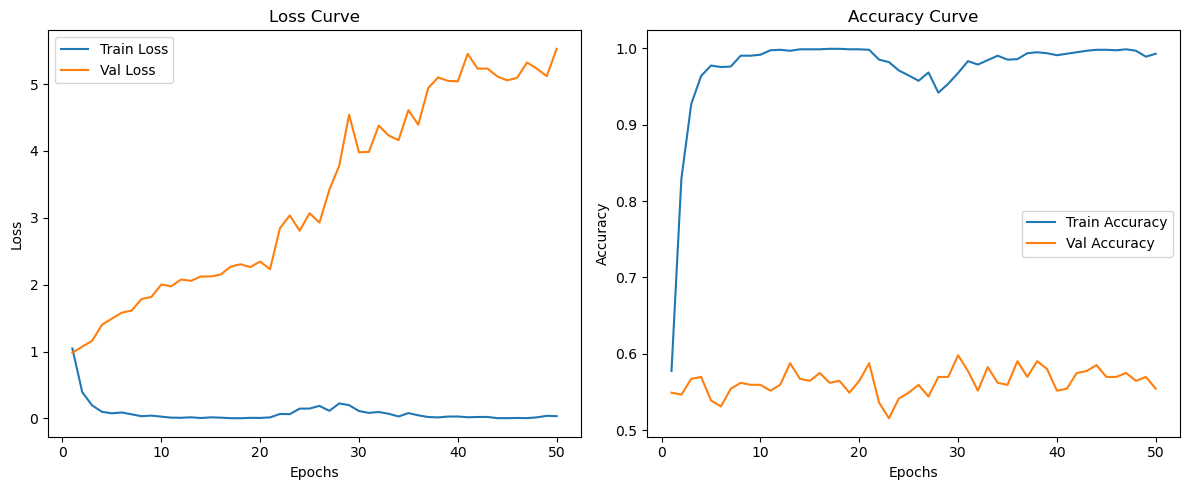

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

model, history = train_model(X_train_split, y_train_split, input_dim=X.shape[1], X_val=X_val, y_val=y_val, epochs=50)
# model.load_state_dict(torch.load("best_model.pth"))
evaluate_model(model, X_test, y_test)
plot_history(history)
